# Principal Component Analysis

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Applying PCA to the cancer dataset for visualization
#### 1- computing histograms of each of the features for the two classes, benign and malignant cancer
Each plot overlays two histograms, one for all of the points in the benign class (blue) and one for all the points in the malignant class (red). This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples. For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.

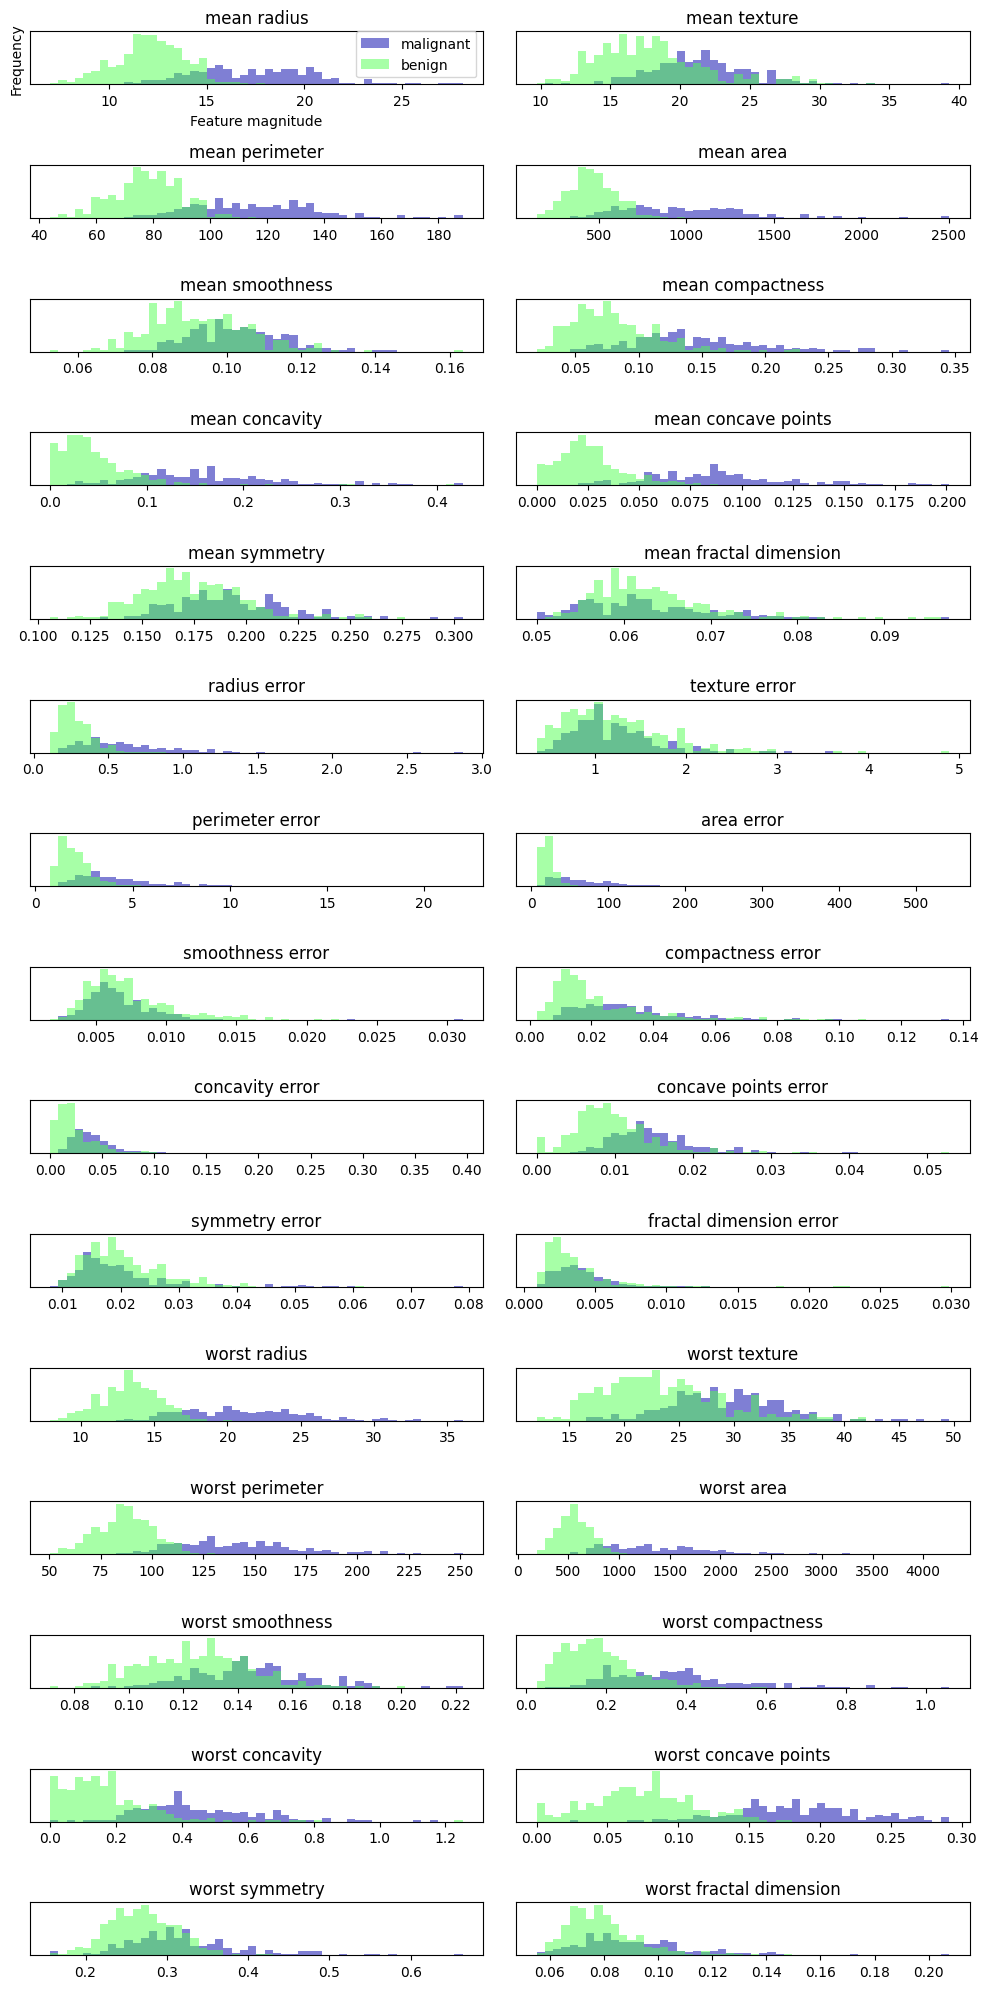

In [9]:
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Before we apply PCA, we scale our data so that each feature has unit variance using StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

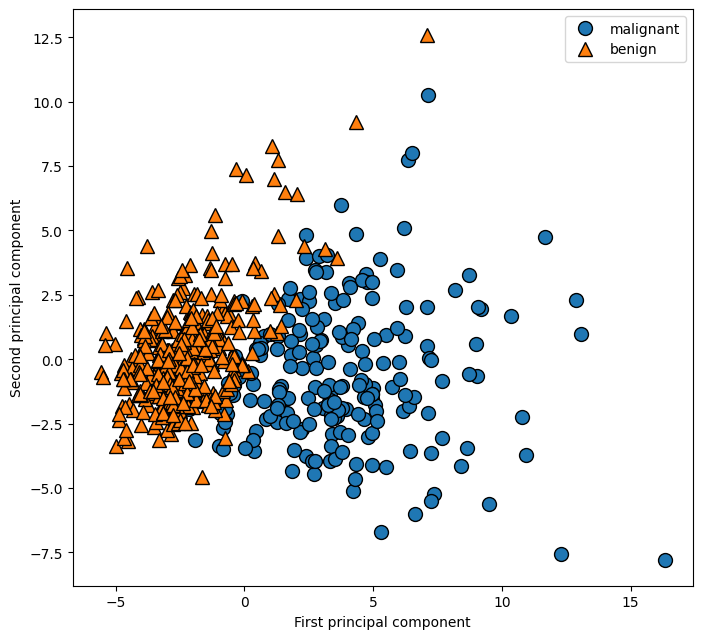

In [12]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see shortly. The principal components themselves are stored in the components_ attribute of the PCA object during fitting.

In [13]:
print(f"PCA component shape: {pca.components_.shape}")
print(f"PCA components:\n{pca.components_}")

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

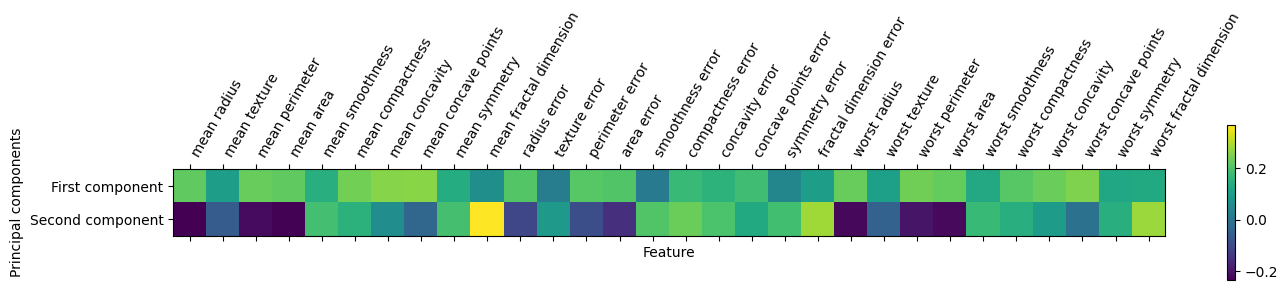

In [15]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

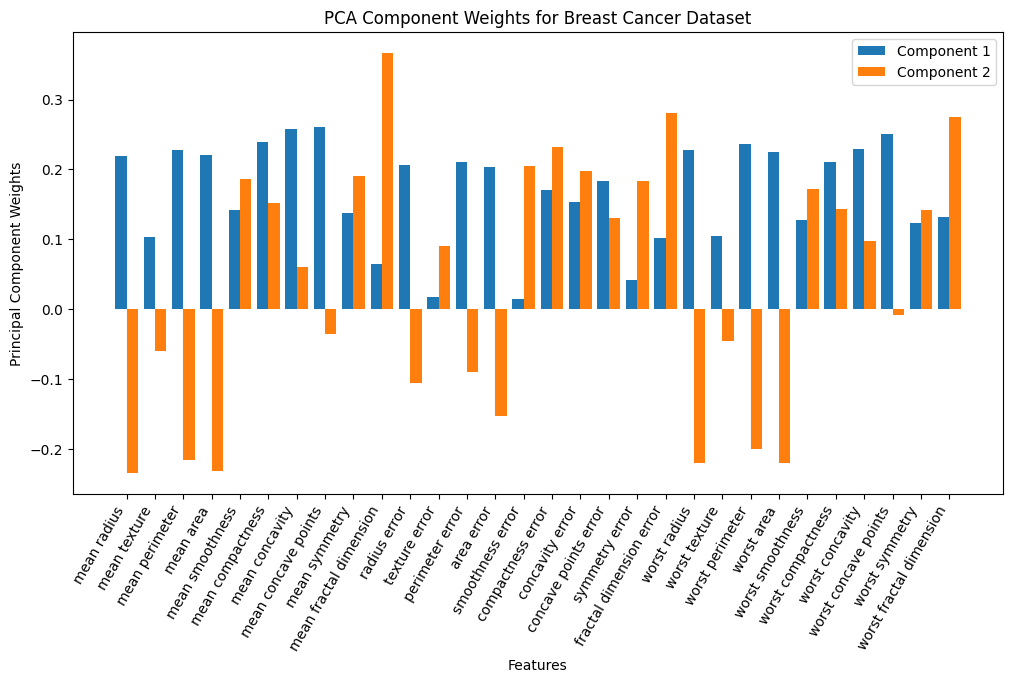

In [14]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x_labels = cancer.feature_names
x = np.arange(len(x_labels))

# Plot each principal component as a bar chart
width = 0.4  # Width of bars
for i, component in enumerate(pca.components_):
    ax.bar(x + i * width, component, width=width, label=f'Component {i+1}')

# Formatting
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_labels, rotation=60, ha='right')
ax.set_xlabel("Features")
ax.set_ylabel("Principal Component Weights")
ax.legend()
ax.set_title("PCA Component Weights for Breast Cancer Dataset")

# Show the chart
plt.show()

## Eigenfaces for feature extraction

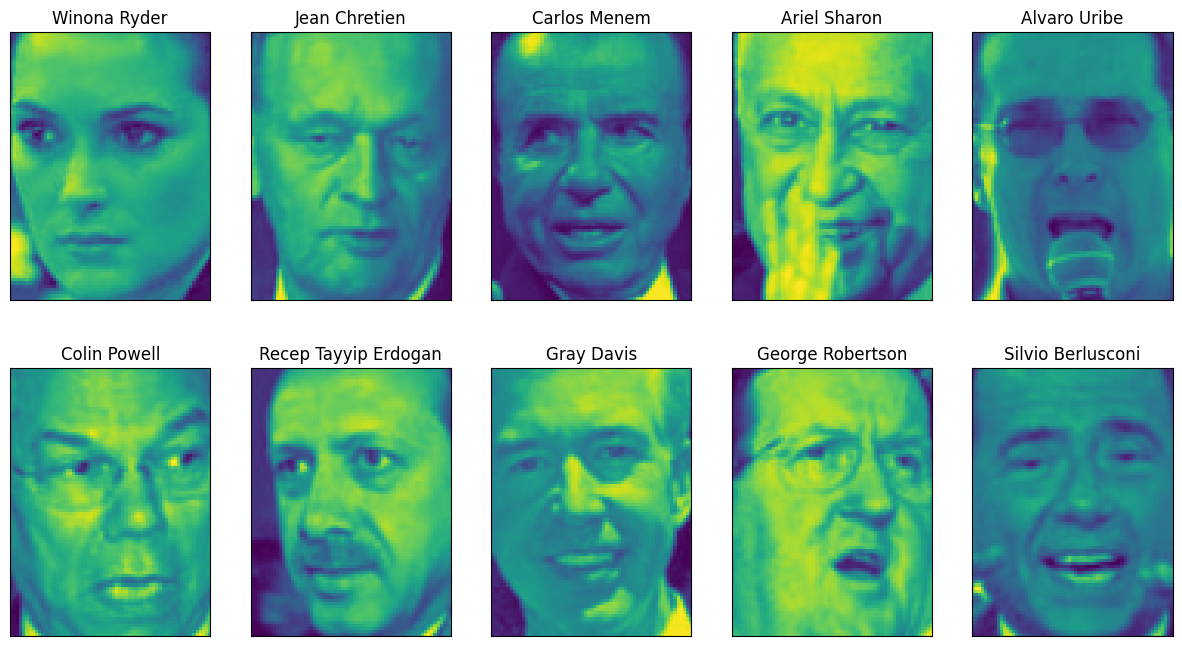

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
# There are 3023 images, each 87 x 65 pixels large, belonging to 62 different people
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [20]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name}: {count}", end="\n")
    

Alejandro Toledo: 39
Alvaro Uribe: 35
Amelie Mauresmo: 21
Andre Agassi: 36
Angelina Jolie: 20
Ariel Sharon: 77
Arnold Schwarzenegger: 42
Atal Bihari Vajpayee: 24
Bill Clinton: 29
Carlos Menem: 21
Colin Powell: 236
David Beckham: 31
Donald Rumsfeld: 121
George Robertson: 22
George W Bush: 530
Gerhard Schroeder: 109
Gloria Macapagal Arroyo: 44
Gray Davis: 26
Guillermo Coria: 30
Hamid Karzai: 22
Hans Blix: 39
Hugo Chavez: 71
Igor Ivanov: 20
Jack Straw: 28
Jacques Chirac: 52
Jean Chretien: 55
Jennifer Aniston: 21
Jennifer Capriati: 42
Jennifer Lopez: 21
Jeremy Greenstock: 24
Jiang Zemin: 20
John Ashcroft: 53
John Negroponte: 31
Jose Maria Aznar: 23
Juan Carlos Ferrero: 28
Junichiro Koizumi: 60
Kofi Annan: 32
Laura Bush: 41
Lindsay Davenport: 22
Lleyton Hewitt: 41
Luiz Inacio Lula da Silva: 48
Mahmoud Abbas: 29
Megawati Sukarnoputri: 33
Michael Bloomberg: 20
Naomi Watts: 22
Nestor Kirchner: 37
Paul Bremer: 20
Pete Sampras: 22
Recep Tayyip Erdogan: 30
Ricardo Lagos: 27
Roh Moo-hyun: 32
Rudol

In [24]:
#Bush appears 530 times, while Colin Powell appears 236 times
# only take up to 50 images of each person, otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database One way to solve this problem would be to build a classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e., very few training examples per class). That makes it hard to train most classifiers. Additionally, you often want to be able to add new people easily, without needing to retrain a large model.
A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying. This classifier could in principle work with only a single training example per class. Let’s take a look at how well KNeighborsClassifier does here:

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.2f}")

Test set score of 1-nn: 0.22


An accuracy of 22% is not actually that bad for a 62-class classification problem (random guessing would give you around 1/62 = 1.5% accuracy).
This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces. When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image. This representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation. For example, using pixel distances means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representation.

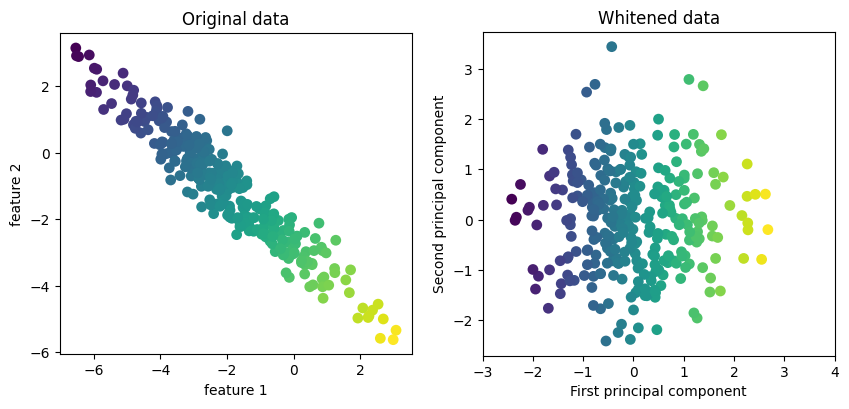

In [26]:
#enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation.
mglearn.plots.plot_pca_whitening()

In [ ]:
#Here we apply PCA to the data, we use 100 components, and we whiten the data.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_traoin_pca.shape: {X_train_pca.shape}")

X_traoin_pca.shape: (1547, 100)


In [28]:
#Now we can build a KNeighborsClassifier on the PCA-reduced data. We will use the same number of neighbors as before.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f"Test set accuracy: {knn.score(X_test_pca, y_test):.2f}")

Test set accuracy: 0.30


Now is better, but not quite, using PCA to extract 100 principal components help, but what else can we do?

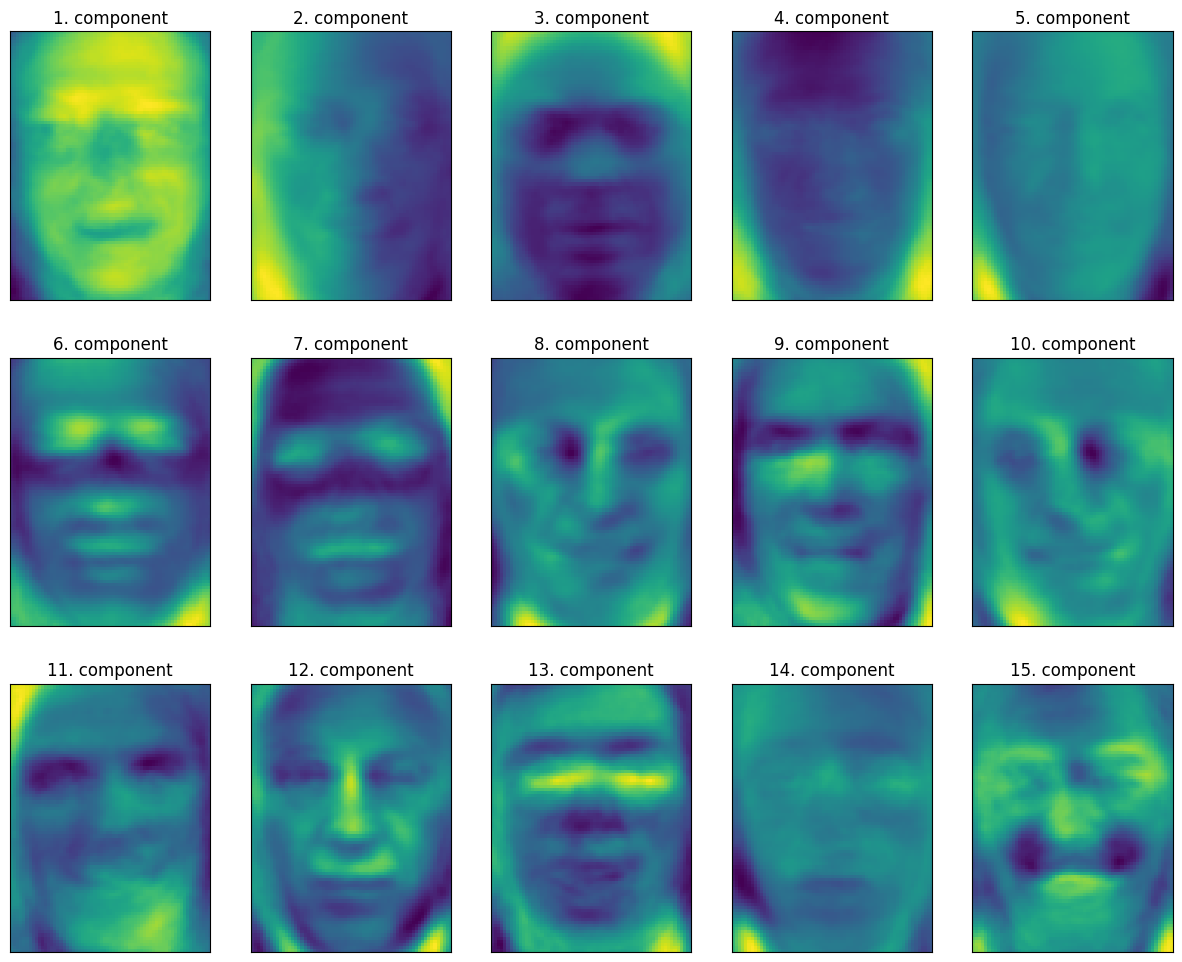

In [30]:
#Printing the components of the PCA
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

The components of visual data can be hard to interpret. How PCA interprets components is not usually the same as humans. Some of the components have more to do with lighting, contrast and other image aspects that are not how humnas interpret a face.